# 3.2 MOO for 1D scalar fields

In [10]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

/home/dharrington/cyclops/src


description

In [11]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'temp_line_field.obj')
grid = pickle_manager.read_file('simulation', 'temp_line_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1], [-1]])*0.002

description

In [12]:
# Setup the sensor suite
temps = pickle_manager.read_file('sensors', 'k-type-T.obj')
voltages = pickle_manager.read_file('sensors', 'k-type-V.obj')
sensor = Thermocouple(temps, voltages, 1)
sensors = np.array([sensor]*5)

sensor_suite = SensorSuite(
    ScalarField(RBFModel, field_bounds), 
    sensors
)

description

In [13]:
# Setup the experiment
optimiser = NSGA2Optimiser('00:20:00')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_moo(
    sensor_suite,
    sensor_bounds,
    repetitions=1000,
    loss_limit=500
)
res = experiment.design()

pickle_manager.save_file('results', 'Temp_1D.obj', res.X)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      1 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |             f
     3 |       60 |      1 |  0.000000E+00 |             f
     4 |       70 |      1 |  0.000000E+00 |             f
     5 |       80 |      1 |  0.000000E+00 |             f
     6 |       90 |      2 |  1.0000000000 |         ideal
     7 |      100 |      2 |  0.2127143548 |         nadir
     8 |      110 |      2 |  0.000000E+00 |             f
     9 |      120 |      2 |  0.000000E+00 |             f
    10 |      130 |      2 |  0.0154420590 |         ideal
    11 |      140 |      2 |  0.0543616573 |         ideal
    12 |      150 |      2 |  0.0310139877 |         nadir
    13 |      160 |      2 |  0.1804073944 |         ideal
    14 |      170 |      2 |  0.1164375198 |         ideal
    15 |      180 |      2 |  0.000000E+00 |             f
    16 |      190 |      2 |  0.000000E+00 |            

description

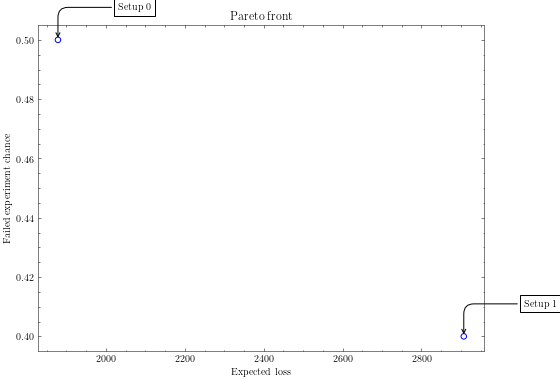


Loss: [1893.2783843282916, 0.5]


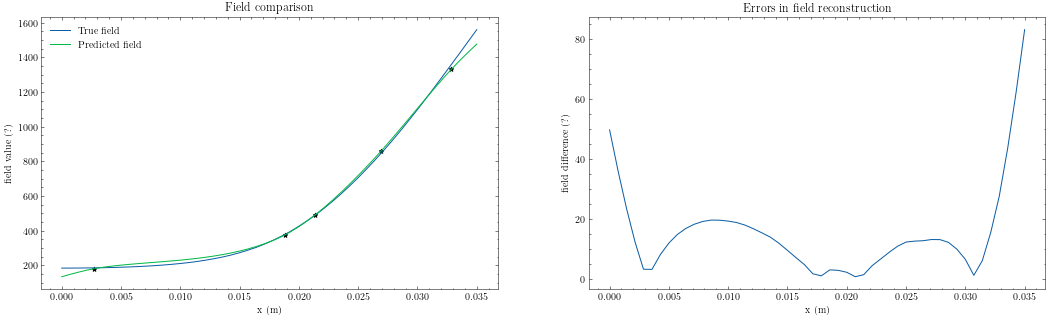


Loss: [1908.927228010835, 0.5]


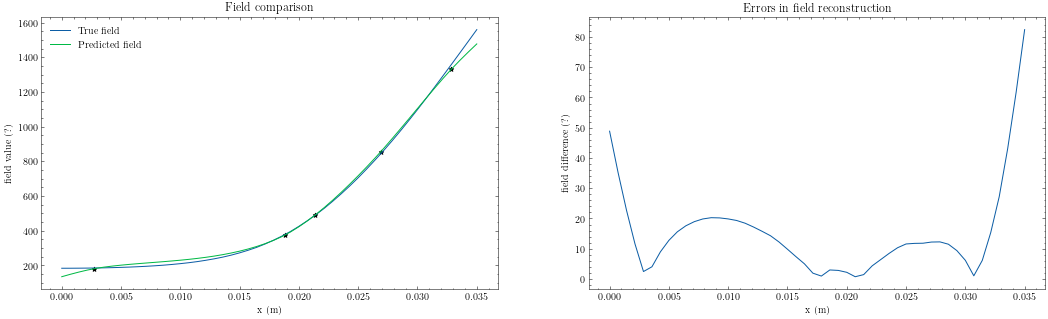

In [14]:
graph_manager.build_pareto(res.F)
graph_manager.draw()

graph_manager.build_pareto(res.F)
graph_manager.save_png('results', 'Pareto.png')

display_str = input('Enter setup to display [Q to quit]: ')
while display_str.isnumeric():
    proposed_layout, true_temps, model_temps, sensor_values = experiment.get_SOO_plotting_arrays(res.X[i])
    print('\nLoss:', experiment.calc_MOO_loss(res.X[i]))
    graph_manager.build_1D_compare(
        grid,
        proposed_layout,
        sensor_values,
        true_temps,
        model_temps
    )
    graph_manager.draw()
    display_str = input('Enter setup to display [Q to quit]: ')